# Functions

So far in the course you have used function to code your solutions. Functions are one of the main components of programs, and a big computer program is usually a collection of many many function that interact between each other. A good function is one that:

- serves a specific purpose
- produces an output for every input
- provides a functionality that can be reused in many other parts of the code


For example, in several exercises in this course you needed to find out if a number is prime or not. Instead of copying and pasting that piece of code from one place to the other, the correct thing to do is to create a function, and *call* this function at the places you need.

In [1]:
# Function definition
def isPrime(n):
    if n < 2:
        return False
    
    for i in range(2,n):
        if n % i == 0:
            return False
        
    return True
        

def allPrimesUpTo(n):
    primes = []
    for i in range(n):
        if isPrime(i):    # Function call
            primes += [i]
            
    return primes

Many times solving a problem involves splitting it into smaller parts, solving the parts, and combining these into a solution for the bigger problem. It might help to implement a function for each of the smaller parts. The advantages of this approach are:

- Testing each function separately is easier than the entire program (specially when function are doing a very specific task, with clear input and output)
- This avoids the propagation of errors. If you made a mistake when writing a function, fixing it involves change only that function.
- Your code is more structured, clear, elegant, and easier to read. It is typically smaller.

Fiding how to organize your code into a set of functions is a little bit like art. You need to be able to find beauty and function in order.

## Function lexicon

We have used a lot of the words related to functions during the course. Let's give them a precise meaning now.

- **Function definition**: the definition of the function (`def isPrime(n): ...` above)
- **Function call**: when a function is used, or invoked (`isPrime(i)` inside the loop above)
- **Parameters**: variables that are the input in the function definition (`n` in `def isPrime(n)`)
- **Arguments**: input passed to a function when it is called (`i` in `isPrime(i)`)
- **Return value**: the value returned by a function call
- **Return type**: type of the value returned by a function
- **Local variable**: variables declared inside functions
- **Global variable**: variables declared outside functions

### More about local and global variables

So far we have only dealt with *local* variables. Since our programs consisted of only one function, there was no need to have *global* variables shared by all functions. If many functions need to access the same information, and this cannot be easily passed as a parameter, it is sometimes useful to keep this information in a global variable. 

For the scope of this course, you will never be required to use global variables, but you can if you think this will make life easier. **Be careful** though... It is very easy to loose track of when and how global variables were modified, and debugging might become a nightmare.

The code below shows how global variables work.

In [2]:
# A global variable
a = 15

# A function declaration
def f():
    global a   # Indicates that the variable a we are using is the global one
    b = a * 10 # Reads a
    a = 100    # Overwrites a (for no good reason)
    return b

print("a before the function call:", a)
print("f() returns:", f())
print("a after the function call:", a)

a before the function call: 15
f() returns: 150
a after the function call: 100


## Interesting facts about functions

### Docstring

When defining functions, you can provide them with a help text placed between triple quotes below the first line of the function declaration. This help text, called *docstring* can be accessed by `help(functionName)`. You can try to call `help` on function that you already know to see their docstring.

In [3]:
def f(a, b):
    """Returns the sum of a and b"""
    c = a + b
    return c

help(f)

Help on function f in module __main__:

f(a, b)
    Returns the sum of a and b



### Default parameters

It is possible to define functions with *default* parameters. These are optional parameters that take a default value in case the user does not pass a value in its place.

In [4]:
def increment(x, inc=1):
    return x + inc

print("No second argument given: ", increment(10))
print("Second argument given: ", increment(10, 5))

No second argument given:  11
Second argument given:  15


### Named parameters

Functions can have *named* parameters, and this way the order of parameters can be changed, or some of them can be ommitted (taking their default value). Many functions in the python libraries have named parameters. For example, when you use `sorted(L, reverse=True)`, you are using the named paramter `reverse` from the `sorted` function.

In [5]:
def f(a, b, c=0, d=1):
    return (a + b + c)*d

print("Using named parameter d and ommitting c:", f(1,1,d=5))

Using named parameter d and ommitting c: 10


## Example: Sudoku

As an example on how we can use functions to avoid code repetition, let's develop a program that checks if a sudoku solution is valid. Sudoku is a game on a 9x9 board that needs to be completed by filling each position with one of the numbers 1 through 9. Initially the board has already some numbers on it. A solved board is one where each column, each row, and each of the nine 3×3 tiles that compose the board contain all of the digits from 1 to 9.

Since we need to check some conditions for several parts of the board, we will make functions for checking that separate from our main function.

In [6]:
import math

def check(L):
    count = 0
    for i in range(1,len(L)+1):
        if L.count(i) != 1:
            count += 1
    if count == 0:
        return True
    else:
        return False

def checkSudoku(B):
    n = len(B)
    
    allLines = B
    
    allCols = []
    for i in range(n):
        c = []
        for j in range(n):
            c += [B[j][i]]
        allCols += [c]
        
    m = int(math.sqrt(n)) # transform float into int
    allBoxes = []
    for i in range(0,n,m):
        # i = 0, 3, 6 (for 9x9 board)
        for j in range(0,n,m):
            # j = 0, 3, 6 (for 9x9 board)
            b = []
            for k in range(m):
                for l in range(m):
                    b += [B[i+k][j+l]]
                    
            allBoxes += [b]
            
    all = allLines + allCols + allBoxes
    
    for lst in all:
        if not check(lst):
            return False
    
    return True
            
    
'''
The board below represents this one:

2 4 5 | 9 8 1 | 3 7 6
1 6 9 | 2 7 3 | 5 8 4
8 3 7 | 5 6 4 | 2 1 9
------+-------+------
9 7 6 | 1 2 5 | 4 3 8
5 1 3 | 4 9 8 | 6 2 7
4 8 2 | 7 3 6 | 9 5 1
------+-------+------
3 9 1 | 6 5 7 | 8 4 2
7 2 8 | 3 4 9 | 1 6 5
6 5 4 | 8 1 2 | 7 9 3
'''
    
board = [
  [2,4,5,9,8,1,3,7,6],
  [1,6,9,2,7,3,5,8,4],
  [8,3,7,5,6,4,2,1,9],
  [9,7,6,1,2,5,4,3,8],
  [5,1,3,4,9,8,6,2,7],
  [4,8,2,7,3,6,9,5,1],
  [3,9,1,6,5,7,8,4,2],
  [7,2,8,3,4,9,1,6,5],
  [6,5,4,8,1,2,7,9,3] ]

checkSudoku(board)

True

## Example: image processing

On a previous lab you were required to implement functions that manipulate an image. The skeleton of all functions were more or less the same. The only thing that changed was the kind of transformation you did to the (r,g,b) values of each pixel.

The transformation of each pixel can be implemented using a function, and this function can be passed as an argument to a function just like a normal variable. See an example in the code below.

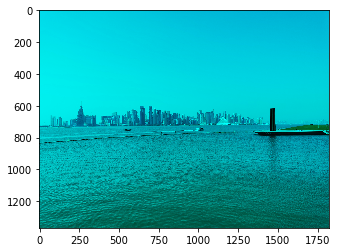

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# Transform function takes a function f as a parameter
def transform(img, f):
    rows = len(img)
    cols = len(img[0])
    new_img = []
    for i in range(rows):
        new_row = []
        for j in range(cols):
            r = img[i][j][0]
            g = img[i][j][1]
            b = img[i][j][2]
            # f is used to transform the previous (r,g,b) value into the new pixel
            new_pixel =  f(r, g, b) 
            new_row += [new_pixel]
        new_img += [new_row]
    return new_img

def makeTransparent(r,g,b):
    return (r,g,b,75)

def makeGrayscale(r,g,b):
    return 0.3*r + 0.59*g + 0.11*b

def removeRed(r,g,b):
    return (0, g, b)


######### Code for showing the picture ########

# Loads the image
img = imread('doha.png') # Change this to a file in your computer so that it works

# The function can be called using the function we want
new_image = transform(img, removeRed)

# Uncomment to test the transform function
plt.imshow(new_image)

plt.show()
